## LEKOUNDA NGOLO Mardochet Gédéon
### COOP MSC | DATA SCIENCE 
### ASSIGNEMENT 2 : Machine Learning
### 30-11-2025

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
#from statsmodels.api import OLS
import statsmodels.api as sm
import sklearn.model_selection as skm
import sklearn.linear_model as skl


from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [2]:
# Charger les données
College = load_data('College')
print("shape of dataset:", College.shape)
print("\nPremières lignes:")
print(College.head())

shape of dataset: (777, 18)

Premières lignes:
  Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60  
1    

In [3]:
print("\nMissing values ?", College.isna().any().any())


Missing values ? False


In [4]:
print("missign values by columns :")
print(College.isna().sum())

missign values by columns :
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64


In [5]:
College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
College['Private'] = College['Private'].map({'Yes': 1, 'No': 0})

In [7]:
College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [8]:
# (a) Split des données en training et test sets
np.random.seed(42)
train_idx = np.random.choice(College.shape[0], 
                              size=int(0.7 * College.shape[0]), 
                              replace=False)
test_idx = np.setdiff1d(np.arange(College.shape[0]), train_idx)

In [9]:
College_train = College.iloc[train_idx]
College_test = College.iloc[test_idx]

print(f"\nTaille du training set: {len(College_train)}")
print(f"Taille du test set: {len(College_test)}")



Taille du training set: 543
Taille du test set: 234


In [10]:
# Préparer X et y
X_train = College_train.drop(columns=['Apps'])
y_train = College_train['Apps']
X_test = College_test.drop(columns=['Apps'])
y_test = College_test['Apps']

In [11]:
# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Fonction pour calculer MSE
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [13]:
# Dictionnaire pour stocker les résultats
results = {}

print("\n" + "="*70)
print("RÉSULTATS DES MODÈLES")
print("="*70)


print("\n(b) Linear Regression (LEAST SQUARES)")
print("-" * 70)


RÉSULTATS DES MODÈLES

(b) Linear Regression (LEAST SQUARES)
----------------------------------------------------------------------


In [14]:
# (b) Ordinary Linear Regression (Least Squares)
## Ajouter une constante pour OLS
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)

In [15]:
ols_model = sm.OLS(y_train, X_train_ols).fit()
y_pred_ols = ols_model.predict(X_test_ols)
mse_ols = calculate_mse(y_test, y_pred_ols)
results['OLS'] = mse_ols

print(f"OLS MSE: {mse_ols:.2f}")

OLS MSE: 1095843.78


In [16]:
print(f"Test MSE: {mse_ols:,.2f}")
print(f"Test RMSE: {np.sqrt(mse_ols):,.2f}")

Test MSE: 1,095,843.78
Test RMSE: 1,046.83


Cela signifie que, en moyenne, le carré de l’erreur de prédiction est d’environ 1 095 843.

Pour se faire une idée intuitive, on peut calculer la racine carrée du MSE (RMSE) : $$\text{RMSE} = \text{MSE} \\ = 1{,}095{,}843.78 \\ \approx 1{,}047.30 $$

Donc en moyenne, la prédiction s’écarte de ±1047 unités par rapport à la vraie valeur.

In [17]:
# (c) Ridge Regression avec CV
print("\n(c) RIDGE REGRESSION")
print("-" * 70)

alphas = np.logspace(-2, 6, 100)
ridge_cv = skl.RidgeCV(alphas=alphas, cv=10)
ridge_cv.fit(X_train_scaled, y_train)

print(f"Lambda optimal (alpha): {ridge_cv.alpha_:.4f}")



(c) RIDGE REGRESSION
----------------------------------------------------------------------
Lambda optimal (alpha): 9.7701


In [18]:
y_pred_ridge = ridge_cv.predict(X_test_scaled)
mse_ridge = calculate_mse(y_test, y_pred_ridge)
results['Ridge'] = mse_ridge

print(f"Test MSE: {mse_ridge:,.2f}")
print(f"Test RMSE: {np.sqrt(mse_ridge):,.2f}")

Test MSE: 1,031,665.85
Test RMSE: 1,015.71


In [19]:
# (d) Lasso avec CV
print("\n(d) LASSO REGRESSION")
print("-" * 70)

lasso_cv = skl.LassoCV(alphas=None, cv=10, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

print(f"Lambda optimal (alpha): {lasso_cv.alpha_:.4f}")


(d) LASSO REGRESSION
----------------------------------------------------------------------
Lambda optimal (alpha): 26.3365


In [20]:
# Compter les coefficients non-nuls
n_nonzero = np.sum(lasso_cv.coef_ != 0)
print(f"Nombre de coefficients non-nuls: {n_nonzero} sur {len(lasso_cv.coef_)}")

y_pred_lasso = lasso_cv.predict(X_test_scaled)
mse_lasso = calculate_mse(y_test, y_pred_lasso)
results['Lasso'] = mse_lasso

print(f"Test MSE: {mse_lasso:,.2f}")
print(f"Test RMSE: {np.sqrt(mse_lasso):,.2f}")

Nombre de coefficients non-nuls: 13 sur 17
Test MSE: 1,058,865.95
Test RMSE: 1,029.01


In [21]:
# Afficher les variables sélectionnées
feature_names = X_train.columns
selected_features = feature_names[lasso_cv.coef_ != 0]
print(f"\nVariables sélectionnées par Lasso:")
for feat in selected_features:
    print(f"  - {feat}")


Variables sélectionnées par Lasso:
  - Private
  - Accept
  - Enroll
  - Top10perc
  - Top25perc
  - P.Undergrad
  - Outstate
  - Room.Board
  - PhD
  - Terminal
  - perc.alumni
  - Expend
  - Grad.Rate


In [22]:
# (e) PCR (Principal Component Regression) avec CV
print("\n(e) PRINCIPAL COMPONENT REGRESSION (PCR)")
print("-" * 70)

# Tester différentes valeurs de M
n_components = X_train.shape[1]
pcr_mse_cv = []

for M in range(1, n_components + 1):
    pca = PCA(n_components=M)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    lr = skl.LinearRegression()
    lr.fit(X_train_pca, y_train)
    #lr = sm.OLS(y_train,X_train_pca).fit()
    y_pred = lr.predict(X_test_pca)
    
    mse = calculate_mse(y_test, y_pred)
    pcr_mse_cv.append(mse)

# Trouver M optimal
M_optimal_pcr = np.argmin(pcr_mse_cv) + 1
mse_pcr = pcr_mse_cv[M_optimal_pcr - 1]
results['PCR'] = mse_pcr


(e) PRINCIPAL COMPONENT REGRESSION (PCR)
----------------------------------------------------------------------


In [23]:

print(f"M optimal (nombre de composantes): {M_optimal_pcr}")
print(f"Test MSE: {mse_pcr:,.2f}")
print(f"Test RMSE: {np.sqrt(mse_pcr):,.2f}")

# Variance expliquée
pca_final = PCA(n_components=M_optimal_pcr)
pca_final.fit(X_train_scaled)
var_explained = np.sum(pca_final.explained_variance_ratio_)
print(f"Variance expliquée par {M_optimal_pcr} composantes: {var_explained:.2%}")

M optimal (nombre de composantes): 16
Test MSE: 1,079,305.63
Test RMSE: 1,038.90
Variance expliquée par 16 composantes: 99.83%


In [24]:
# (f) PLS (Partial Least Squares) avec CV
print("\n(f) PARTIAL LEAST SQUARES (PLS)")
print("-" * 70)

pls_mse_cv = []

for M in range(1, n_components + 1):
    pls = PLSRegression(n_components=M)
    pls.fit(X_train_scaled, y_train)
    y_pred = pls.predict(X_test_scaled).ravel()
    
    mse = calculate_mse(y_test, y_pred)
    pls_mse_cv.append(mse)

# Trouver M optimal
M_optimal_pls = np.argmin(pls_mse_cv) + 1
mse_pls = pls_mse_cv[M_optimal_pls - 1]
results['PLS'] = mse_pls

print(f"M optimal (nombre de composantes): {M_optimal_pls}")
print(f"Test MSE: {mse_pls:,.2f}")
print(f"Test RMSE: {np.sqrt(mse_pls):,.2f}")


(f) PARTIAL LEAST SQUARES (PLS)
----------------------------------------------------------------------
M optimal (nombre de composantes): 8
Test MSE: 1,061,785.93
Test RMSE: 1,030.43


In [25]:
# (g) Comparaison des résultats
print("\n" + "="*70)
print("(g) COMPARAISON DES RÉSULTATS")
print("="*70)

# Tableau comparatif
results_df = pd.DataFrame({
    'Modèle': list(results.keys()),
    'Test MSE': list(results.values()),
    'Test RMSE': [np.sqrt(mse) for mse in results.values()]
})
results_df = results_df.sort_values('Test MSE')
results_df['Rang'] = range(1, len(results_df) + 1)

print("\n" + results_df.to_string(index=False))


(g) COMPARAISON DES RÉSULTATS

Modèle     Test MSE   Test RMSE  Rang
 Ridge 1.031666e+06 1015.709531     1
 Lasso 1.058866e+06 1029.012121     2
   PLS 1.061786e+06 1030.429976     3
   PCR 1.079306e+06 1038.896352     4
   OLS 1.095844e+06 1046.825571     5


In [26]:
# Statistiques descriptives sur y_test
print(f"\n\nStatistiques sur les applications (test set):")
print(f"  - Moyenne: {y_test.mean():,.2f}")
print(f"  - Écart-type: {y_test.std():,.2f}")
print(f"  - Min: {y_test.min():,.0f}")
print(f"  - Max: {y_test.max():,.0f}")



Statistiques sur les applications (test set):
  - Moyenne: 3,021.25
  - Écart-type: 3,652.72
  - Min: 100
  - Max: 21,804


In [27]:
# Erreur relative
best_rmse = np.sqrt(results_df.iloc[0]['Test MSE'])
print(f"\n\nMeilleure RMSE: {best_rmse:,.2f}")
print(f"Erreur relative (RMSE / Écart-type): {best_rmse / y_test.std():.2%}")



Meilleure RMSE: 1,015.71
Erreur relative (RMSE / Écart-type): 27.81%


In [28]:
# Analyse des différences
print("\n\nAnalyse des différences entre modèles:")
min_mse = results_df['Test MSE'].min()
max_mse = results_df['Test MSE'].max()
diff_percent = ((max_mse - min_mse) / min_mse) * 100

print(f"  - Différence entre meilleur et pire modèle: {diff_percent:.2f}%")
print(f"  - Meilleur modèle: {results_df.iloc[0]['Modèle']}")
print(f"  - Pire modèle: {results_df.iloc[-1]['Modèle']}")

print("\n\nCONCLUSIONS:")
print("-" * 70)
print(f"1. Précision de prédiction:")
print(f"   - RMSE ≈ {best_rmse:,.0f} applications")
print(f"   - Cela représente environ {best_rmse / y_test.mean() * 100:.1f}% de la moyenne")
print(f"   - Les modèles prédisent raisonnablement bien le nombre d'applications")

print(f"\n2. Comparaison des méthodes:")
if diff_percent < 5:
    print(f"   - Les différences sont FAIBLES ({diff_percent:.2f}%)")
    print(f"   - Tous les modèles ont des performances similaires")
elif diff_percent < 15:
    print(f"   - Les différences sont MODÉRÉES ({diff_percent:.2f}%)")
    print(f"   - Le choix du modèle a un impact limité")
else:
    print(f"   - Les différences sont SIGNIFICATIVES ({diff_percent:.2f}%)")
    print(f"   - Le choix du modèle est important")

print(f"\n3. Recommandations:")
if results_df.iloc[0]['Modèle'] in ['Ridge', 'Lasso']:
    print(f"   - Les méthodes de régularisation performent bien")
    print(f"   - Cela suggère qu'il y a du sur-ajustement dans OLS")
if 'Lasso' in results_df.iloc[:2]['Modèle'].values:
    print(f"   - Lasso offre l'avantage de la sélection de variables")
    print(f"   - Utile pour l'interprétabilité avec {n_nonzero} variables sélectionnées")



Analyse des différences entre modèles:
  - Différence entre meilleur et pire modèle: 6.22%
  - Meilleur modèle: Ridge
  - Pire modèle: OLS


CONCLUSIONS:
----------------------------------------------------------------------
1. Précision de prédiction:
   - RMSE ≈ 1,016 applications
   - Cela représente environ 33.6% de la moyenne
   - Les modèles prédisent raisonnablement bien le nombre d'applications

2. Comparaison des méthodes:
   - Les différences sont MODÉRÉES (6.22%)
   - Le choix du modèle a un impact limité

3. Recommandations:
   - Les méthodes de régularisation performent bien
   - Cela suggère qu'il y a du sur-ajustement dans OLS
   - Lasso offre l'avantage de la sélection de variables
   - Utile pour l'interprétabilité avec 13 variables sélectionnées



[Graphiques générés]


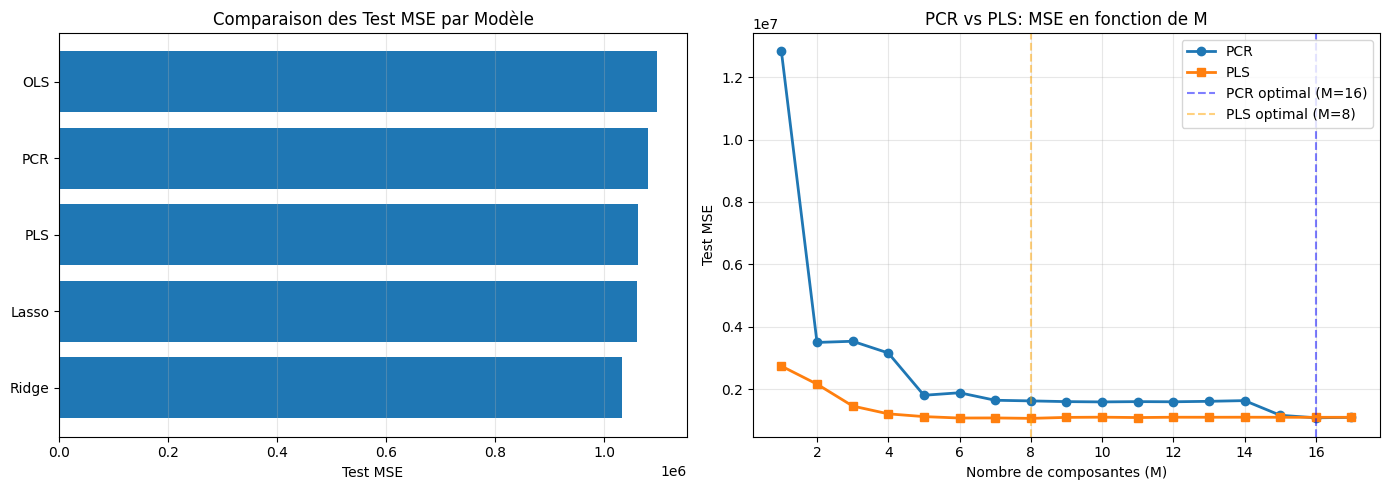

In [29]:
# Visualisation
fig, axes = subplots(1, 2, figsize=(14, 5))
# Graphique 1: Comparaison des MSE
axes[0].barh(results_df['Modèle'], results_df['Test MSE'])
axes[0].set_xlabel('Test MSE')
axes[0].set_title('Comparaison des Test MSE par Modèle')
axes[0].grid(axis='x', alpha=0.3)

# Graphique 2: MSE en fonction du nombre de composantes
axes[1].plot(range(1, n_components + 1), pcr_mse_cv, 'o-', label='PCR', linewidth=2)
axes[1].plot(range(1, n_components + 1), pls_mse_cv, 's-', label='PLS', linewidth=2)
axes[1].axvline(M_optimal_pcr, color='blue', linestyle='--', alpha=0.5, label=f'PCR optimal (M={M_optimal_pcr})')
axes[1].axvline(M_optimal_pls, color='orange', linestyle='--', alpha=0.5, label=f'PLS optimal (M={M_optimal_pls})')
axes[1].set_xlabel('Nombre de composantes (M)')
axes[1].set_ylabel('Test MSE')
axes[1].set_title('PCR vs PLS: MSE en fonction de M')
axes[1].legend()
axes[1].grid(alpha=0.3)

fig.tight_layout()
print("\n[Graphiques générés]")

## Question 9 in Chapter 7

### (a) Use the poly() function from the ISLP.models module to fit a cubic polynomial regression to predict nox using dis. Report the regression output, and plot the resulting data and polynomial fits.

In [30]:
import numpy as np, pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (summarize,
                         poly,
                         ModelSpec as MS)
from statsmodels.stats.anova import anova_lm

In [31]:
from pygam import (s as s_gam,
                   l as l_gam,
                   f as f_gam,
                   LinearGAM,
                   LogisticGAM)

from ISLP.transforms import (BSpline,
                             NaturalSpline)
from ISLP.models import bs, ns
from ISLP.pygam import (approx_lam,
                        degrees_of_freedom,
                        plot as plot_gam,
                        anova as anova_gam)

In [32]:
# Charger les données
Boston = load_data('Boston')
print("shape of dataset:", Boston.shape)
print("\nPremières lignes:")
print(Boston.head())

shape of dataset: (506, 13)

Premières lignes:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


In [33]:
X = Boston[['dis']]
y = Boston['nox']

In [34]:

# Définition du modèle (degree = 3)
poly_dis = MS([poly('dis', degree=3)])
# Matrice de design transformée
X_poly = poly_dis.fit(Boston).transform(Boston)
# Variable réponse
y = Boston['nox']
# Ajustement du modèle
model3 = sm.OLS(y, X_poly).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     419.3
Date:                Sat, 29 Nov 2025   Prob (F-statistic):          2.71e-136
Time:                        01:55:07   Log-Likelihood:                 690.44
No. Observations:                 506   AIC:                            -1373.
Df Residuals:                     502   BIC:                            -1356.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                  0

In [35]:
summarize(model3)

,coef,std err,t,P>|t|
intercept,0.5547,0.003,201.021,0.0
"poly(dis, degree=3)[0]",-2.0031,0.062,-32.271,0.0
"poly(dis, degree=3)[1]",0.8563,0.062,13.796,0.0
"poly(dis, degree=3)[2]",-0.3180,0.062,-5.124,0.0


### Interpretation : 

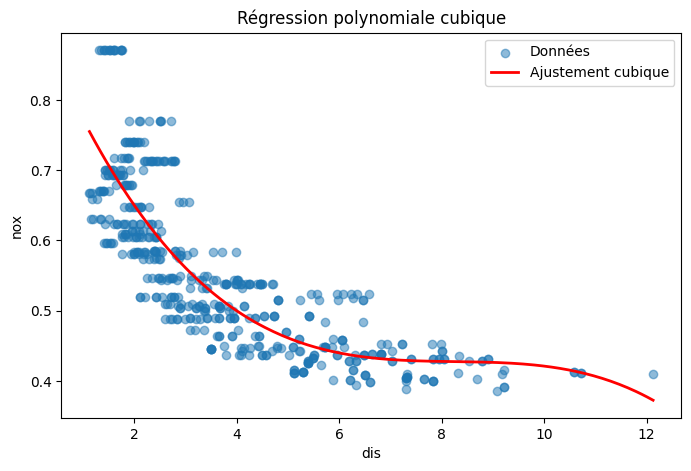

In [36]:
# Grille pour tracer
dis_grid = np.linspace(Boston['dis'].min(), Boston['dis'].max(), 200)
grid_df = pd.DataFrame({'dis': dis_grid})

# Transformation sur la grille
grid_poly = poly_dis.transform(grid_df)

# Prédictions
y_hat = model3.predict(grid_poly)

plt.figure(figsize=(8,5))
plt.scatter(Boston['dis'], y, alpha=0.5, label='Données')
plt.plot(dis_grid, y_hat, color='red', linewidth=2, label='Ajustement cubique')
plt.xlabel('dis')
plt.ylabel('nox')
plt.title('Régression polynomiale cubique')
plt.legend()
plt.show()

### Interpretation

### b) Plot the polynomial fits for a range of different polynomial degrees (from 1 to 10)

In [37]:
rss = []
degrees = range(1, 11)

for d in degrees:
    ms = MS([poly('dis', degree=d)])
    Xd = ms.fit(Boston).transform(Boston)
    model_d = sm.OLS(y, Xd).fit()
    rss.append(sum(model_d.resid**2))


In [38]:
for d, r in zip(degrees, rss):
    print(f"Degré {d} : RSS = {r:.4f}")

Degré 1 : RSS = 2.7686
Degré 2 : RSS = 2.0353
Degré 3 : RSS = 1.9341
Degré 4 : RSS = 1.9330
Degré 5 : RSS = 1.9153
Degré 6 : RSS = 1.8783
Degré 7 : RSS = 1.8495
Degré 8 : RSS = 1.8356
Degré 9 : RSS = 1.8333
Degré 10 : RSS = 1.8322


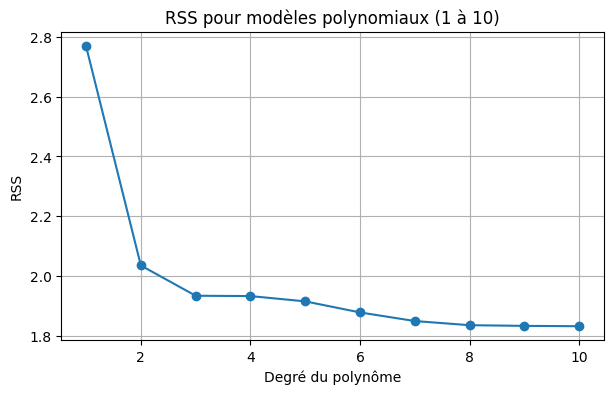

In [39]:
plt.figure(figsize=(7,4))
plt.plot(degrees, rss, marker='o')
plt.xlabel("Degré du polynôme")
plt.ylabel("RSS")
plt.title("RSS pour modèles polynomiaux (1 à 10)")
plt.grid(True)
plt.show()

### Interpretations

### (c) Perform cross-validation and results explanation

In [40]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

In [41]:
X_vec = np.asarray(X).reshape(-1, 1)   # assure 1D
y_vec = np.asarray(y)

degrees = range(1, 11)
kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_errors = []

In [42]:

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X_vec)

    mse_folds = []
    for train_idx, test_idx in kf.split(X_vec):
        X_train, X_test = X_poly[train_idx], X_poly[test_idx]
        y_train, y_test = y_vec[train_idx], y_vec[test_idx]

        X_train = sm.add_constant(X_train)
        model = sm.OLS(y_train, X_train).fit()

        X_test = sm.add_constant(X_test)
        mse_folds.append(np.mean((y_test - model.predict(X_test))**2))

    cv_errors.append(np.mean(mse_folds))

best_degree = degrees[np.argmin(cv_errors)]
print("Optimal polynomial degree =", best_degree)

Optimal polynomial degree = 3


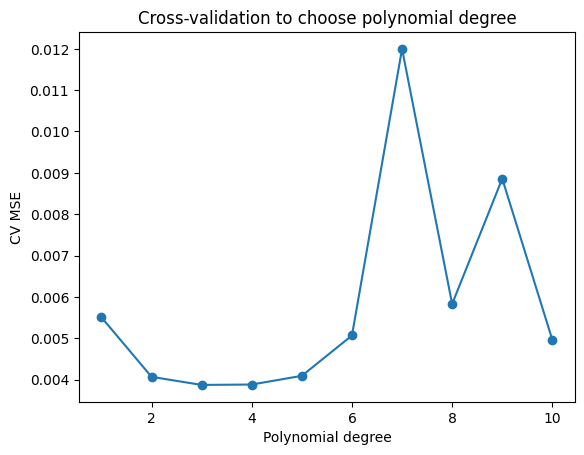

In [43]:
plt.plot(degrees, cv_errors, marker="o")
plt.xlabel("Polynomial degree")
plt.ylabel("CV MSE")
plt.title("Cross-validation to choose polynomial degree")
plt.show()


### Interpretation



### d) Use the bs() function from the ISLP.models module to fit a regression spline to predict nox using dis. Report the output forthe fit using four degrees of freedom

In [44]:
from ISLP.models import bs

# df=4 pour une spline cubique -> 1 nœud interne
# Choix du nœud interne : médiane de dis
median_dis = np.median(X_vec)
bs_dis = MS([bs('dis', internal_knots=[median_dis])])

# Transformation spline
X_spline = bs_dis.fit_transform(pd.DataFrame({'dis': X_vec.flatten()}))

# Modèle OLS
X_spline = sm.add_constant(X_spline)
model_spline = sm.OLS(y_vec, X_spline).fit()
print(model_spline.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     316.5
Date:                Sat, 29 Nov 2025   Prob (F-statistic):          1.39e-135
Time:                        01:55:08   Log-Likelihood:                 691.93
No. Observations:                 506   AIC:                            -1374.
Df Residuals:                     501   BIC:                            -1353.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [45]:
summarize(model_spline)

,coef,std err,t,P>|t|
intercept,0.7345,0.015,50.306,0.000
"bs(dis, internal_knots=[3.2074499999999997])[0]",-0.0581,0.022,-2.658,0.008
"bs(dis, internal_knots=[3.2074499999999997])[1]",-0.4636,0.024,-19.596,0.000
"bs(dis, internal_knots=[3.2074499999999997])[2]",-0.1998,0.043,-4.634,0.000
"bs(dis, internal_knots=[3.2074499999999997])[3]",-0.3888,0.046,-8.544,0.000


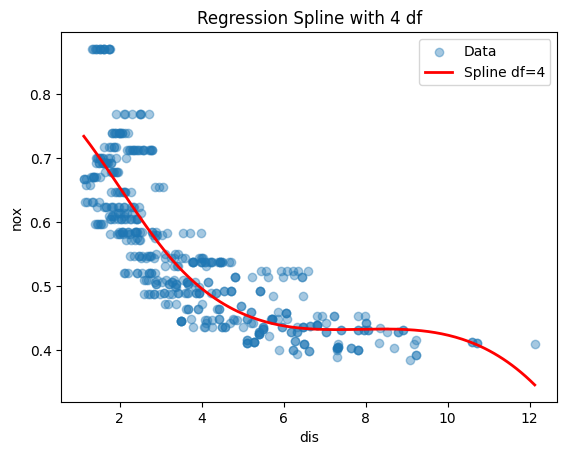

In [46]:
# Tracé de la spline
X_grid = np.linspace(X_vec.min(), X_vec.max(), 200)
X_grid_df = pd.DataFrame({'dis': X_grid})
X_grid_spline = bs_dis.transform(X_grid_df)
X_grid_spline = sm.add_constant(X_grid_spline)
y_pred = model_spline.predict(X_grid_spline)

plt.scatter(X_vec, y_vec, alpha=0.4, label='Data')
plt.plot(X_grid, y_pred, 'r', linewidth=2, label='Spline df=4')
plt.xlabel("dis")
plt.ylabel("nox")
plt.title("Regression Spline with 4 df")
plt.legend()
plt.show()

How knots has chosens ?

- With df=4, bs() automatiquement put nodes on quantiles :

- for df = K, on obtient K − degree nœuds internes

with degree=3 (cubic spline), cela donne :
 *  4 − 3 = 1 internal knot
 *  put in 50th `dis` percentile 

### (e) Now fit a regression spline for a range of degrees of freedom, and plot the resulting fits and report the resulting RSS.

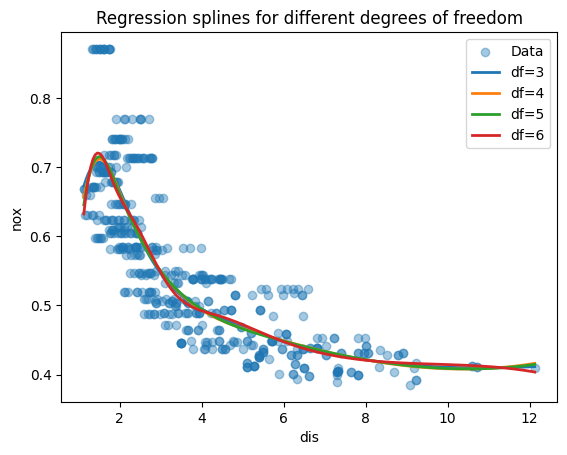

df=3: RSS = 1.840
df=4: RSS = 1.834
df=5: RSS = 1.830
df=6: RSS = 1.817


In [47]:
# Liste de degrés de liberté à tester
dfs = [3, 4, 5, 6]  # tu peux en ajouter d'autres

rss_list = []

plt.scatter(X_vec, y_vec, alpha=0.4, label='Data')

# Grille pour tracer
X_grid = np.linspace(X_vec.min(), X_vec.max(), 200)
X_grid_df = pd.DataFrame({'dis': X_grid})

for df in dfs:
    # Choix des nœuds internes : df-1 nœud interne pour cubic spline
    # Ex: df=4 -> 1 nœud interne -> positionné aux quantiles
    n_knots = df - 1
    knots = np.percentile(X_vec, np.linspace(0, 100, n_knots + 2)[1:-1])
    
    # Création de la spline
    bs_dis = MS([bs('dis', internal_knots=knots)])
    
    # Transformation
    X_spline = bs_dis.fit_transform(pd.DataFrame({'dis': X_vec.flatten()}))
    X_spline = sm.add_constant(X_spline)
    
    # Ajustement OLS
    model_spline = sm.OLS(y_vec, X_spline).fit()
    
    # Prédictions pour la grille
    X_grid_spline = bs_dis.transform(X_grid_df)
    X_grid_spline = sm.add_constant(X_grid_spline)
    y_pred = model_spline.predict(X_grid_spline)
    
    # Tracé
    plt.plot(X_grid, y_pred, linewidth=2, label=f'df={df}')
    
    # Calcul du RSS
    rss = np.sum((y_vec - model_spline.predict(X_spline))**2)
    rss_list.append(rss)

plt.xlabel("dis")
plt.ylabel("nox")
plt.title("Regression splines for different degrees of freedom")
plt.legend()
plt.show()

# Affichage des RSS
for df, rss in zip(dfs, rss_list):
    print(f"df={df}: RSS = {rss:.3f}")

### Interpretation 
Internal node selection:

- For a cubic spline, df = #knots + degree + 1.

- Here we simplify: n_knots = df - 1 and place them at the uniform quantiles of dis.

- fit_transform(): converts to an array usable for OLS.

**RSS**: **sum of squared residuals for each model.**

**Plotting**: **all curves on the same graph → visual comparison of flexibility**.

## Question 10 in Chapter 7

## (a) Split the data into a training set and a test set. 
Using out-of-state tuition as the response and the other variables as the predictors,
perform forward stepwise selection on the training set in order
to identify a satisfactory model that uses just a subset of the
predictors.

In [48]:
# Charger les données
college = load_data('College')
print("shape of dataset:", College.shape)
college.head()

shape of dataset: (777, 18)


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [49]:
college['Private'] = college['Private'].map({'Yes': 1, 'No': 0})

In [50]:
np.random.seed(42)
train_x = np.random.choice(college.shape[0], 
                              size=int(0.7 * college.shape[0]), 
                              replace=False)
test_x = np.setdiff1d(np.arange(college.shape[0]), train_idx)

In [51]:
# Réponse et prédicteurs
y = college['Outstate']
X = college.drop(columns='Outstate')

# Convertir les variables catégorielles si nécessaire
X = pd.get_dummies(X, drop_first=True)

In [52]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [53]:
def forward_selection(X, y, feature_names=None, verbose=True):
    import statsmodels.api as sm
    if feature_names is None:
        feature_names = [f"x{i}" for i in range(X.shape[1])]
    remaining = list(feature_names)
    selected = []
    current_score = -np.inf
    best_new_score = -np.inf

    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            try_features = selected + [candidate]
            X_subset = pd.DataFrame(X, columns=feature_names)[try_features]
            X_sm = sm.add_constant(X_subset)
            model = sm.OLS(y, X_sm).fit()
            score = model.rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            if verbose:
                print(f"Add {best_candidate}, adjusted R^2: {current_score:.4f}")
        else:
            break
    return selected


In [54]:
selected_features = forward_selection(X_train, y_train)
print("Selected features:", selected_features)

Add x1, adjusted R^2: 0.5879
Add x2, adjusted R^2: 0.6918
Add x3, adjusted R^2: 0.7067
Selected features: ['x1', 'x2', 'x3']


### (b) Fit a GAM on the training data, 
using out-of-state tuition as the response and the features selected in the previous step as
the predictors. Plot the results, and explain your findings.

In [56]:
"""from pygam import LinearGAM, s



# Créer une formule GAM avec spline pour chaque variable
splines = [s(i) for i in range(len(selected_features))]
# Générer dynamiquement les termes splines
terms = sum([s(i) for i in range(len(selected_features))])


# Ajuster le GAM
gam = LinearGAM(terms).fit(X_train[selected_features].values, y_train.values)

# Afficher le résumé
print(gam.summary())"""


'from pygam import LinearGAM, s\n\n\n\n# Créer une formule GAM avec spline pour chaque variable\nsplines = [s(i) for i in range(len(selected_features))]\n# Générer dynamiquement les termes splines\nterms = sum([s(i) for i in range(len(selected_features))])\n\n\n# Ajuster le GAM\ngam = LinearGAM(terms).fit(X_train[selected_features].values, y_train.values)\n\n# Afficher le résumé\nprint(gam.summary())'

In [ ]:
""" 
plt.figure(figsize=(15, 5*len(selected_features)))

for i, feature in enumerate(selected_features):
    plt.subplot(len(selected_features), 1, i+1)
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=0.95)[1], c='r', ls='--')  # 95% CI
    plt.xlabel(feature)
    plt.ylabel("Effect on Outstate")
    plt.title(f"GAM effect of {feature}")
    
plt.tight_layout()
plt.show()
"""

## Question 8 in Chapter 8

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

## (a) Split the data set into a training set and a test set. Please split it evenly in half.

In [58]:
# Chargement des données
Carseats = load_data('Carseats')

print("="*70)
print("EXERCICE 8: REGRESSION TREES SUR CARSEATS")
print("="*70)
print(f"\nDimensions du dataset: {Carseats.shape}")
print(f"\nPremières lignes:\n{Carseats.head()}")
print(f"\nRésumé statistique:\n{Carseats.describe()}")

EXERCICE 8: REGRESSION TREES SUR CARSEATS

Dimensions du dataset: (400, 11)

Premières lignes:
   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  

Résumé statistique:
            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.6

In [59]:
# Préparation des données - conversion des variables catégorielles
X = pd.get_dummies(Carseats.drop('Sales', axis=1), drop_first=True)
y = Carseats['Sales']

print(f"\nVariables après encodage: {list(X.columns)}")


Variables après encodage: ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes']


In [60]:
# ============================================================================
# (a) Split the data set into a training set and a test set
# ============================================================================
print("\n" + "="*70)
print("(a) SPLIT EN TRAINING ET TEST SET")
print("="*70)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

print(f"Taille du training set: {X_train.shape[0]}")
print(f"Taille du test set: {X_test.shape[0]}")


(a) SPLIT EN TRAINING ET TEST SET
Taille du training set: 200
Taille du test set: 200


In [61]:
# ============================================================================
# (b) Fit a regression tree to the training set
# ============================================================================
print("\n" + "="*70)
print("(b) REGRESSION TREE SUR LE TRAINING SET")
print("="*70)

# Arbre complet (non élagué)
tree_full = DecisionTreeRegressor(random_state=42)
tree_full.fit(X_train, y_train)

# Prédictions
y_train_pred = tree_full.predict(X_train)
y_test_pred = tree_full.predict(X_test)


(b) REGRESSION TREE SUR LE TRAINING SET


In [62]:
# Calcul des MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"\nArbre complet:")
print(f"  Nombre de feuilles: {tree_full.get_n_leaves()}")
print(f"  Profondeur: {tree_full.get_depth()}")
print(f"  Training MSE: {train_mse:.4f}")
print(f"  Test MSE: {test_mse:.4f}")
print(f"  Test RMSE: {np.sqrt(test_mse):.4f}")


Arbre complet:
  Nombre de feuilles: 200
  Profondeur: 17
  Training MSE: 0.0000
  Test MSE: 6.9443
  Test RMSE: 2.6352


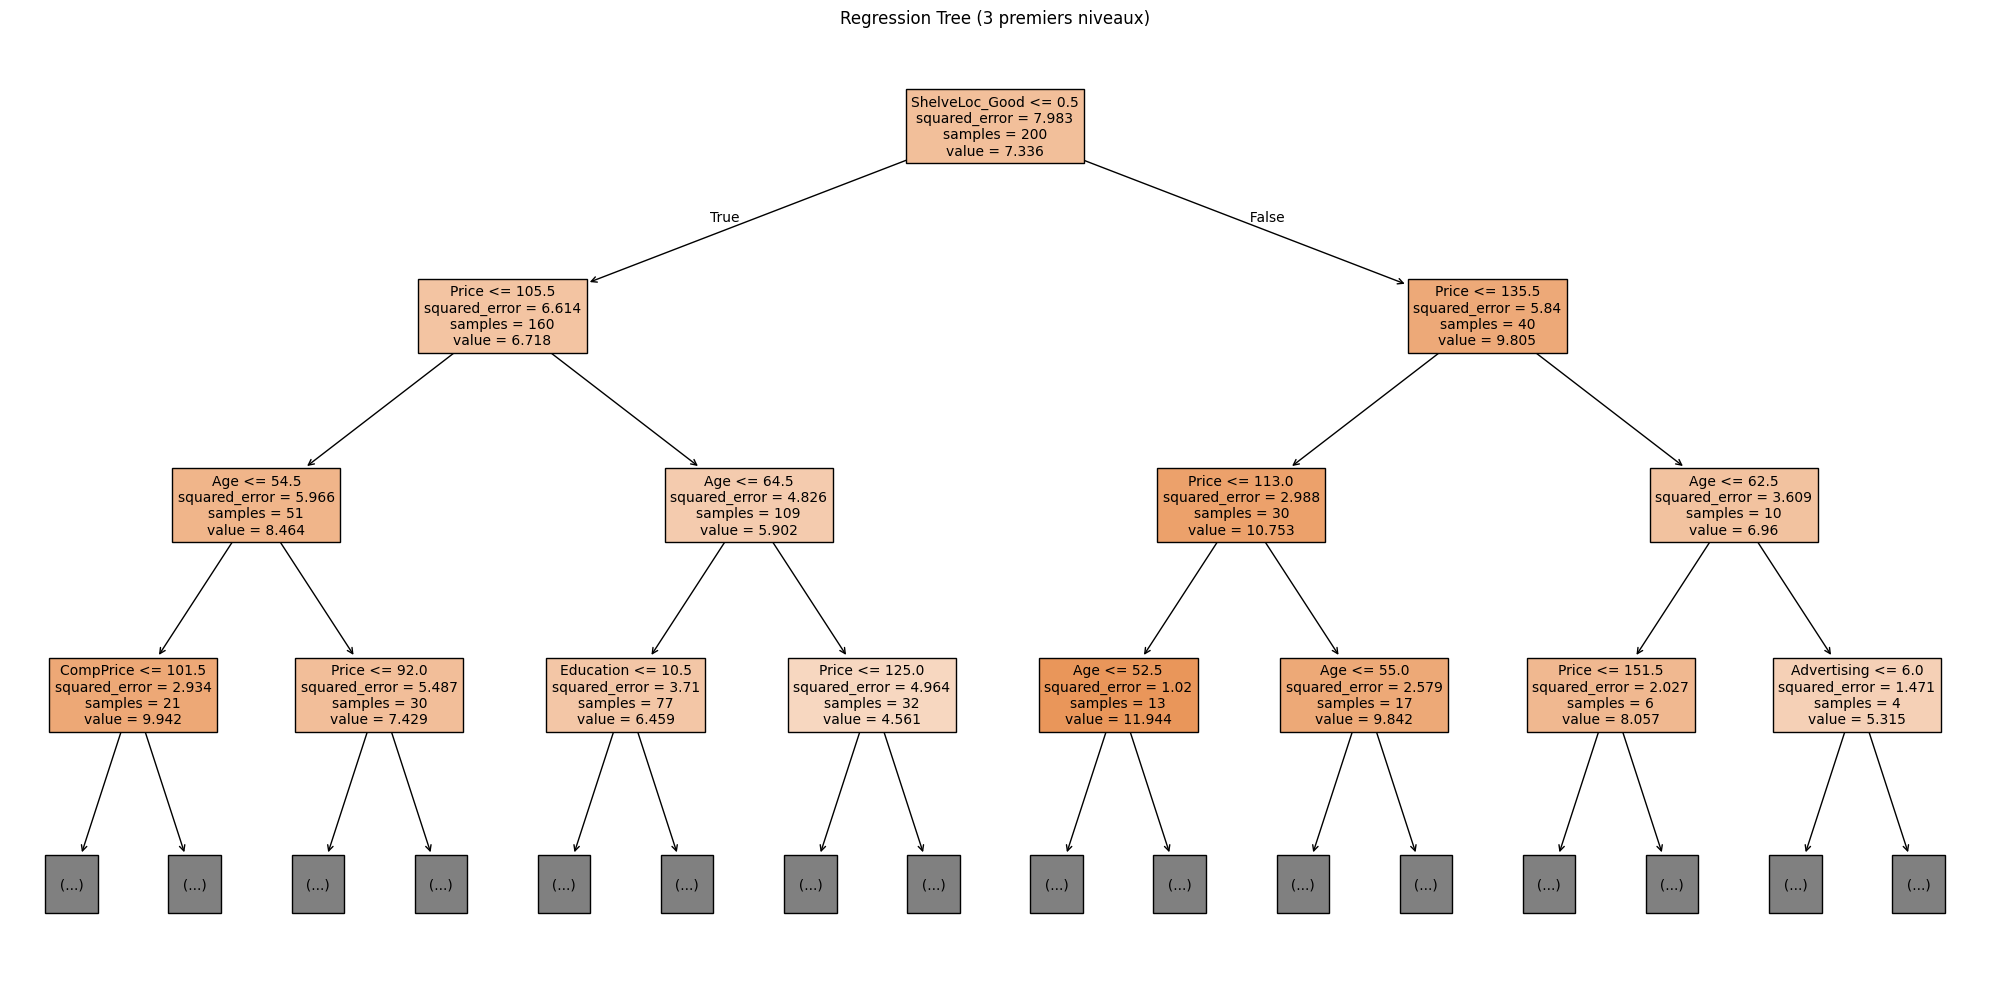

In [74]:
# Visualisation de l'arbre (simplifié pour la lisibilité)
plt.figure(figsize=(20, 10))
plot_tree(tree_full, feature_names=X.columns, filled=True, 
          max_depth=3, fontsize=10)
plt.title("Regression Tree (3 premiers niveaux)")
plt.tight_layout()
plt.savefig('regression_tree.png', dpi=150, bbox_inches='tight')
plt.show()

In [64]:
print("\nInterprétation:")
print("- L'arbre utilise plusieurs variables pour prédire Sales")
print("- Les splits les plus hauts utilisent les variables les plus importantes")
print("- Un arbre trop profond risque de sur-ajuster les données")


Interprétation:
- L'arbre utilise plusieurs variables pour prédire Sales
- Les splits les plus hauts utilisent les variables les plus importantes
- Un arbre trop profond risque de sur-ajuster les données


In [65]:
# ============================================================================
# (c) Use cross-validation to determine optimal tree complexity
# ============================================================================
print("\n" + "="*70)
print("(c) CROSS-VALIDATION POUR L'ÉLAGAGE")
print("="*70)

# On teste différentes valeurs de ccp_alpha (cost complexity pruning)
path = tree_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

print(f"\nNombre de valeurs alpha testées: {len(ccp_alphas)}")


(c) CROSS-VALIDATION POUR L'ÉLAGAGE

Nombre de valeurs alpha testées: 191


In [66]:
# Pour chaque alpha, on calcule le MSE par validation croisée
cv_scores = []
trees = []

for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(tree, X_train, y_train, 
                            cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())
    trees.append(tree)

# Meilleur alpha
best_idx = np.argmin(cv_scores)
best_alpha = ccp_alphas[best_idx]
best_cv_mse = cv_scores[best_idx]

print(f"\nMeilleur ccp_alpha: {best_alpha:.6f}")
print(f"MSE en cross-validation: {best_cv_mse:.4f}")


Meilleur ccp_alpha: 0.156734
MSE en cross-validation: 5.0399



(e) RANDOM FOREST - EFFET DE m (max_features)

Analyse de l'effet du nombre de variables considérées à chaque split...
Nombre total de prédicteurs: p = 11

Entraînement des Random Forests avec différentes valeurs de m:
------------------------------------------------------------


In [78]:
# Entraînement de l'arbre élagué
tree_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
tree_pruned.fit(X_train, y_train)

y_test_pred_pruned = tree_pruned.predict(X_test)
test_mse_pruned = mean_squared_error(y_test, y_test_pred_pruned)

print(f"\nArbre élagué:")
print(f"  Nombre de feuilles: {tree_pruned.get_n_leaves()}")
print(f"  Profondeur: {tree_pruned.get_depth()}")
print(f"  Test MSE: {test_mse_pruned:.4f}")
print(f"  Test RMSE: {np.sqrt(test_mse_pruned):.4f}")

print(f"\nComparaison:")
print(f"  Test MSE (arbre complet): {test_mse:.4f}")
print(f"  Test MSE (arbre élagué): {test_mse_pruned:.4f}")
print(f"  Amélioration: {test_mse - test_mse_pruned:.4f}")

if test_mse_pruned < test_mse:
    print("  ✓ L'élagage améliore le test MSE!")
else:
    print("  ✗ L'élagage n'améliore pas le test MSE")


Arbre élagué:
  Nombre de feuilles: 11
  Profondeur: 5
  Test MSE: 5.4636
  Test RMSE: 2.3374

Comparaison:
  Test MSE (arbre complet): 6.9443
  Test MSE (arbre élagué): 5.4636
  Amélioration: 1.4806
  ✓ L'élagage améliore le test MSE!


In [80]:
# ============================================================================
# (d) Bagging approach
# ============================================================================
print("\n" + "="*70)
print("(d) BAGGING ET RANDOM FOREST")
print("="*70)

# Bagging
print("\nBagging (tous les prédicteurs):")
bag = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)
bag.fit(X_train, y_train)

y_test_pred_bag = bag.predict(X_test)
test_mse_bag = mean_squared_error(y_test, y_test_pred_bag)

print(f"  Test MSE: {test_mse_bag:.4f}")
print(f"  Test RMSE: {np.sqrt(test_mse_bag):.4f}")

# Random Forest (pour comparaison)
print("\nRandom Forest:")
rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_test_pred_rf = rf.predict(X_test)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

print(f"  Test MSE: {test_mse_rf:.4f}")
print(f"  Test RMSE: {np.sqrt(test_mse_rf):.4f}")


(d) BAGGING ET RANDOM FOREST

Bagging (tous les prédicteurs):
  Test MSE: 2.9538
  Test RMSE: 1.7187

Random Forest:
  Test MSE: 2.9306
  Test RMSE: 1.7119


In [81]:
# Importance des variables
print("\n" + "-"*70)
print("IMPORTANCE DES VARIABLES (Bagging)")
print("-"*70)

# Calcul de l'importance moyenne sur tous les arbres
importances_bag = np.mean([
    tree.feature_importances_ for tree in bag.estimators_
], axis=0)

importance_df_bag = pd.DataFrame({
    'Variable': X.columns,
    'Importance': importances_bag
}).sort_values('Importance', ascending=False)

print(importance_df_bag.to_string(index=False))

print("\n" + "-"*70)
print("IMPORTANCE DES VARIABLES (Random Forest)")
print("-"*70)

importance_df_rf = pd.DataFrame({
    'Variable': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print(importance_df_rf.to_string(index=False))


----------------------------------------------------------------------
IMPORTANCE DES VARIABLES (Bagging)
----------------------------------------------------------------------
        Variable  Importance
           Price    0.335619
             Age    0.164998
  ShelveLoc_Good    0.155414
       CompPrice    0.090696
     Advertising    0.081178
          Income    0.049427
      Population    0.042232
       Education    0.036924
ShelveLoc_Medium    0.030745
       Urban_Yes    0.007751
          US_Yes    0.005015

----------------------------------------------------------------------
IMPORTANCE DES VARIABLES (Random Forest)
----------------------------------------------------------------------
        Variable  Importance
           Price    0.335330
             Age    0.164324
  ShelveLoc_Good    0.155531
       CompPrice    0.091085
     Advertising    0.081307
          Income    0.049759
      Population    0.042006
       Education    0.037170
ShelveLoc_Medium    0.030715


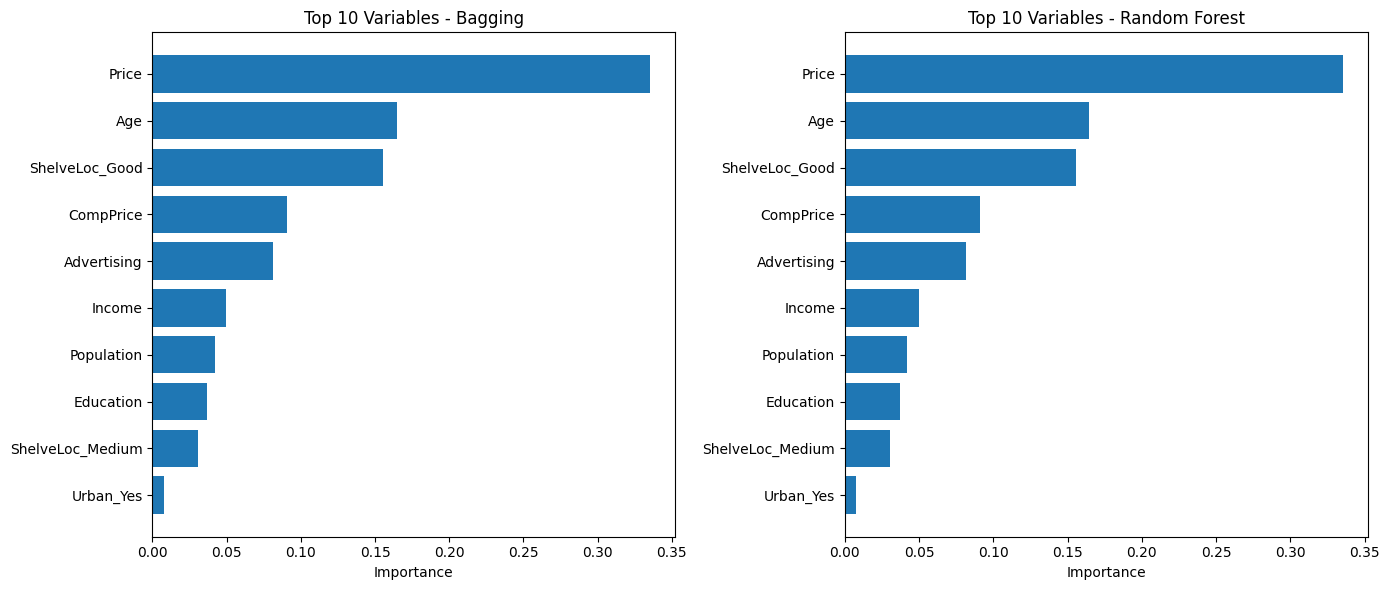

In [82]:
# Visualisation des importances
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bagging
axes[0].barh(importance_df_bag['Variable'][:10], 
             importance_df_bag['Importance'][:10])
axes[0].set_xlabel('Importance')
axes[0].set_title('Top 10 Variables - Bagging')
axes[0].invert_yaxis()

# Random Forest
axes[1].barh(importance_df_rf['Variable'][:10], 
             importance_df_rf['Importance'][:10])
axes[1].set_xlabel('Importance')
axes[1].set_title('Top 10 Variables - Random Forest')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

In [72]:
#============================================================================
# RÉSUMÉ FINAL
# ============================================================================
print("\n" + "="*70)
print("RÉSUMÉ DES RÉSULTATS")
print("="*70)

results = pd.DataFrame({
    'Modèle': ['Arbre complet', 'Arbre élagué', 'Bagging', 'Random Forest'],
    'Test MSE': [test_mse, test_mse_pruned, test_mse_bag, test_mse_rf],
    'Test RMSE': [np.sqrt(test_mse), np.sqrt(test_mse_pruned), 
                   np.sqrt(test_mse_bag), np.sqrt(test_mse_rf)]
})

print("\n", results.to_string(index=False))

print("\nConclusions:")
print(f"- Le meilleur modèle est: {results.loc[results['Test MSE'].idxmin(), 'Modèle']}")
print(f"- Les variables les plus importantes sont: {', '.join(importance_df_rf['Variable'][:3].values)}")
print("- Les méthodes d'ensemble (Bagging/RF) surpassent les arbres individuels")
print("- L'élagage peut améliorer la généralisation pour les arbres individuels")


RÉSUMÉ DES RÉSULTATS

        Modèle  Test MSE  Test RMSE
Arbre complet  6.944264   2.635197
 Arbre élagué  5.463638   2.337443
      Bagging  2.953838   1.718673
Random Forest  2.930605   1.711901

Conclusions:
- Le meilleur modèle est: Random Forest
- Les variables les plus importantes sont: Price, Age, ShelveLoc_Good
- Les méthodes d'ensemble (Bagging/RF) surpassent les arbres individuels
- L'élagage peut améliorer la généralisation pour les arbres individuels


In [83]:
# ============================================================================
# (e) Random Forests - Effect of m (max_features)
# ============================================================================
print("\n" + "="*70)
print("(e) RANDOM FOREST - EFFET DE m (max_features)")
print("="*70)

print("\nAnalyse de l'effet du nombre de variables considérées à chaque split...")
print(f"Nombre total de prédicteurs: p = {X_train.shape[1]}")

# Tester différentes valeurs de m
m_values = [1, 2, 3, 4, 5, 6, 8, 10, X_train.shape[1]]
test_mse_values = []
oob_scores = []

print("\nEntraînement des Random Forests avec différentes valeurs de m:")
print("-" * 60)


(e) RANDOM FOREST - EFFET DE m (max_features)

Analyse de l'effet du nombre de variables considérées à chaque split...
Nombre total de prédicteurs: p = 11

Entraînement des Random Forests avec différentes valeurs de m:
------------------------------------------------------------


In [ ]:
from ISLP.models import ModelSpec as MS

from sklearn.tree import (DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import (RandomForestRegressor as RF,
                             GradientBoostingRegressor as GBR)

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

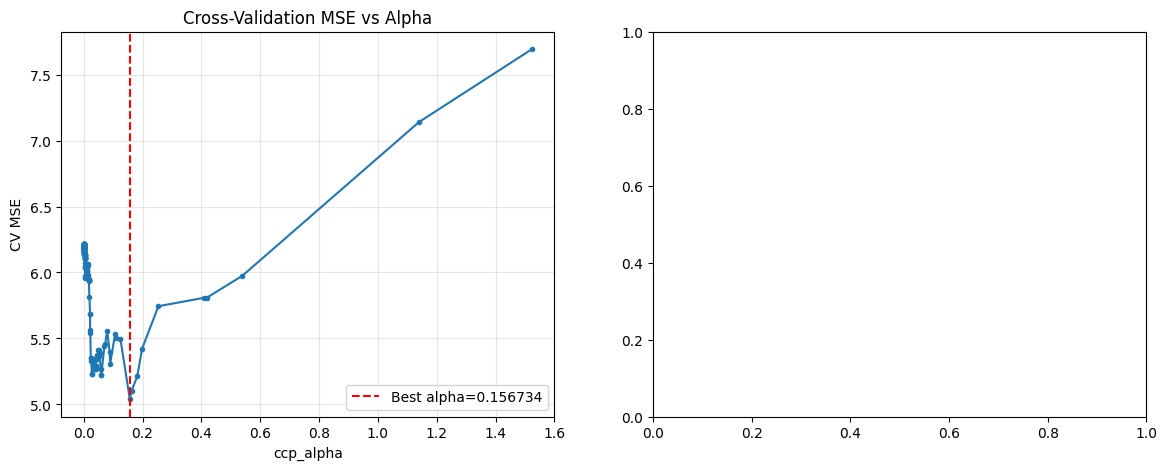

In [84]:
# Graphique: CV MSE en fonction de alpha
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(ccp_alphas, cv_scores, marker='o', markersize=3)
axes[0].axvline(best_alpha, color='red', linestyle='--', 
                label=f'Best alpha={best_alpha:.6f}')
axes[0].set_xlabel('ccp_alpha')
axes[0].set_ylabel('CV MSE')
axes[0].set_title('Cross-Validation MSE vs Alpha')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Nombre de feuilles en fonction de alpha
n_leaves = [tree.get_n_leaves() for tree in trees]
axes[1].plot(ccp_alphas, n_leaves, marker='o', markersize=3)
axes[1].axvline(best_alpha, color='red', linestyle='--')
axes[1].set_xlabel('ccp_alpha')
axes[1].set_ylabel('Number of leaves')
axes[1].set_title('Tree Size vs Alpha')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pruning_analysis.png', dpi=150, bbox_inches='tight')
plt.show()